In [31]:
from NgambilAPI import TwitterScraper as TS
import matplotlib.pyplot as plt
import pickle
import os

In [32]:
find = "btc-usd"

In [33]:
scraper = TS(find, num=5)

In [34]:
ini = scraper.scrape(dataframe=True)
ini

,Position,Title,Time,Message,Highlight,link,display_link
0,0,Meta,None,What have you imagined recently? Drop your lat...,[meta],https://twitter.com/meta,https://twitter.com › meta
1,1,Meta Newsroom (@MetaNewsroom) / ...,None,"All the Meta news, all in one place. Send medi...","[Meta, meta]",https://twitter.com/metanewsroom,https://twitter.com › metanewsroom
2,2,Facebook,None,"... voice notes 🎙️, photos , videos 📽️, and GI...",[Meta],https://twitter.com/facebook,https://twitter.com › facebook
3,3,AI at Meta (@AIatMeta) / X,None,"NIM inference microservice, Meta Llama 3 is eq...",[Meta],https://twitter.com/aiatmeta,https://twitter.com › aiatmeta
4,4,Meta Quest (@MetaQuestVR) / X,None,Expand your world with Meta Quest 3 ... THRASH...,"[Meta, Meta]",https://twitter.com/metaquestvr,https://twitter.com › metaquestvr


In [35]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [36]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62838\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62838\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62838\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
ini['Message'] = ini['Message'].apply(clean_text)

In [38]:
path = os.path.join('sentimen_analisis_model','NB.pickle')
with open(path, 'rb') as file:
    model = pickle.load(file)

path = os.path.join('sentimen_analisis_model','vectorizer.pkl')
with open(path, 'rb') as file:
    vectorizer = pickle.load(file)

path = os.path.join('Logistic_regression_model', 'LR.pickle')
with open(path,'rb') as file:
    LR=pickle.load(file)

In [39]:
x = vectorizer.transform(ini['Message'])

In [40]:
prediction = model.predict(x)
prediction

array(['positive', 'neutral', 'neutral', 'neutral', 'positive'],
      dtype='<U8')

In [41]:
from sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()
LE.fit(['negative', 'neutral','positive'])
sentiment = LE.transform(prediction)
sentiment

array([2, 1, 1, 1, 2])

In [42]:
hitung =0
for i in sentiment:
    hitung = hitung+i
sentimentnya = hitung/len(sentiment)

In [43]:
import get_data
df = get_data.stocks(find)

Meta Platforms, Inc.


In [44]:
df.head()
data = df.reset_index()

In [45]:
date = data['Date']
X = data[['Close']]

In [46]:
y_pred = LR.predict(X)

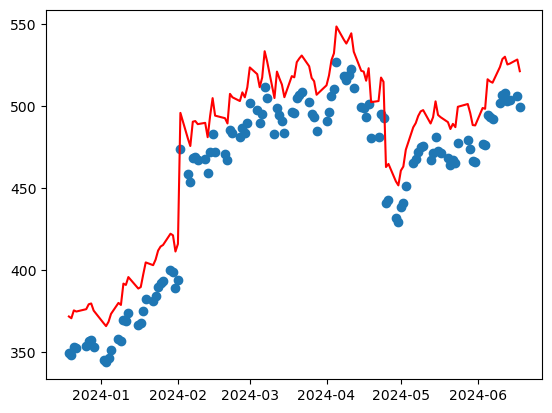

In [47]:
plt.scatter(date,X)
plt.plot(date,y_pred, color = "Red")
plt.show()

In [48]:
real_price = float(X['Close'].iloc[-1])
price_predict = float(y_pred[-1])
print(f"Current Price       : $ {real_price:.2f} ")
print(f"Prediction Price    : $ {price_predict:.2f} ")

Current Price       : $ 499.49 
Prediction Price    : $ 521.50 


In [49]:
if sentimentnya>1.5:
    print("Sentiment Analysis : Naik")
elif sentimentnya<1.5 and sentimentnya>1:
    print("Sentiment Analysis : netrual")
else:
    print("Sentiment Analysis : Turun")

Sentiment Analysis : netrual
